In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn.svm import SVC

# Keras
from keras.models import Sequential
from keras.layers import Dense

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

Using TensorFlow backend.


In [21]:
# Set workspace
pd.set_option('display.max_columns', 500)
# Set output charackters to 110 (not 79)
pd.options.display.width = 110
# To give multiple cell output. Not just the last command.
#InteractiveShell.ast_node_interactivity = 'last'

In [10]:
# Load data as 'df'
df = pd.read_csv('DF_Himalayas_Expeditions_MLready.csv')
print('Shape:', df.shape)

Shape: (63113, 178)


First extract the required labeled (output) feature and and remove the other output features. 

In [11]:
# Extract the labels feature and drop it from the training data
y = df['msuccess'].values

In [12]:
# Before dropping 'msuccess', first create the heuristic dataframe. More on this later.
df_heuristic = df[['comrte', 'calcage', 'msuccess']]
df.drop('msuccess', inplace=True, axis=1, errors='ignore')

In [13]:
# Reshape
X = np.array(df)
#y = y.reshape(-1, 1)  

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (63113, 177)
y shape:  (63113,)


In [14]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

Heuristic score: 74.73 %
ROC score          : 0.6684


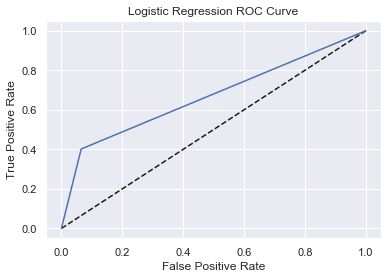

In [17]:
# Commercial route 'comrte' prediction score on success

h_count = 0
for i in range(len(X_test)):
    if X_test[i,15] == y_test[i]:
        h_count += 1

print('Heuristic score: {:0.2f}'.format(h_count / len(X_test)*100),'%')

# Another way to do it, but quicker? (vectorised)
#(len(y_test) - (X_test[:,37] ^ y_test.reshape(1,-1)).sum()) / len(y_test) * 100

# Calculate ROC. Use 'mo2used' values for y_pred
print('ROC score          : {:0.4f}'.format(roc_auc_score(y_test, X_test[:,15])))

# Plot the ROC curve
sns.set()
fpr, tpr, thresholds = roc_curve(y_test, X_test[:,15])
_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Logistic Regression ROC Curve')
plt.show();

In [18]:
# Gradient Boost Classifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
clf3.fit(X_train, y_train) 

#clf_score(clf3)

# Most accurate, but slowest

NameError: name 'clf_score' is not defined

In [19]:
clf3

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
me = np.zeros(df.shape[1])
#df.iloc[0][0]
me[0]=38
me[13]=1
me[15]=0
me[16]=1
me[17]=1
me[19]=2019
me[20]=3
me[24]=3
me[25]=1600
me[26]=3
me[27]=2
me[37]=5
me[38]=9000
me[39]=1
me[41]=1990
me[42]=1
me[49]=1
me[128]=1
me[153]=1
me[162]=1
me[173]=1
me[174]=1



In [64]:
me = me.reshape(1, -1)
me.shape

(1, 177)

In [65]:
X_test.shape

(18934, 177)

In [66]:
clf3.predict(me)

array([0], dtype=int64)